# Machine Learning (Major) Assignment by Pranav Bansal

# About the Dataset

The dataset was developed by starting with satellite images of the ocean,some of which contain an oilspill and some that do not.Images were split into sections and processed using computer vision algorithms to provide a vector of features to describe the contents of the image section or patch. The task is,given a vector that describes the contents of a patch of a satellite image,then predicts whether the patch contains an oil spill or not,e.g.from the illegal or accidental dumping of oil in the ocean.There are two classes and the goal is to distinguish between spill and non-spill using the features for a given ocean patch.

● Non-Spill : negative case, or majority class.

● Oil Spill : positive case, or minority class.

There are a total of 50 Columns in the Dataset , the output column is named as target.

# Things to do in this Assignment

●Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary.

●Use the various methods such as Handling nullvalues , One-HotEncoding, Imputation and Scaling of Data Pre-Processing where necessary.

●Derive some insights from the dataset.

●Apply various Machine Learning techniques to predict the output in target column, make use of Bagging and Ensemble as required and find the best model by evaluating the model using Model evaluation techniques.

●Save the best model and Load the model

●Take the original dataset and make another dataset by randomly picking 20 datapoints from the oil spill dataset and apply the saved model on the same.

# Importing Basic Libraries

In [117]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Data into DataFrame

In [118]:
# Loading the Dataset
df = pd.read_csv('/content/oil_spill.csv')
df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


# Exploring data and Performing Data Cleaning and Pre-Processing

In [119]:
# Showing First 5 Rows
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [120]:
# Showing Last 5 Rows
df.tail()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0
936,204,11,7.73,235.73,135,89100,61.82,12.24,831.0,0.20,...,254.56,254.56,127.28,180.00,2.00,0,3782.68,65.65,6.26,0


In [121]:
# Showing no. of rows and columns in the dataset
df.shape

(937, 50)

In [122]:
# Showing Columns of dataset
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [123]:
# Checking for data types
df.dtypes

f_1         int64
f_2         int64
f_3       float64
f_4       float64
f_5         int64
f_6         int64
f_7       float64
f_8       float64
f_9       float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23        int64
f_24      float64
f_25      float64
f_26      float64
f_27      float64
f_28      float64
f_29      float64
f_30      float64
f_31      float64
f_32      float64
f_33      float64
f_34      float64
f_35        int64
f_36        int64
f_37      float64
f_38      float64
f_39        int64
f_40        int64
f_41      float64
f_42      float64
f_43      float64
f_44      float64
f_45      float64
f_46        int64
f_47      float64
f_48      float64
f_49      float64
target      int64
dtype: object

In [124]:
# Checking for unique Data types
df.dtypes.value_counts()

float64    39
int64      11
dtype: int64

In [125]:
# Showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [126]:
# Showing Statistical Information about the dataset
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


Handling Duplicated Values

In [127]:
# Checking for Duplicated Values
df.duplicated().sum()

0

Handling Null Values

In [128]:
# Checking for missing values
nv = df.isna().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

There are no null values in the dataset

Checking for unique values


In [129]:
df.nunique().sort_values()

f_23        1
target      2
f_46        2
f_37        3
f_33        4
f_26        8
f_40        9
f_39        9
f_27        9
f_22        9
f_25        9
f_32       42
f_34       45
f_15       53
f_20       53
f_10       57
f_12       59
f_21       68
f_13       73
f_16       91
f_24       92
f_31      107
f_14      107
f_36      110
f_35      141
f_48      169
f_19      170
f_5       179
f_42      220
f_1       238
f_49      286
f_2       297
f_28      308
f_6       375
f_41      388
f_30      392
f_29      447
f_45      499
f_9       561
f_11      577
f_8       618
f_43      644
f_44      649
f_38      758
f_18      810
f_7       820
f_17      893
f_3       927
f_4       933
f_47      937
dtype: int64

In [130]:
df['f_23'].unique()

array([0])

In [131]:
df['f_46'].unique()

array([0, 1])

In [132]:
df['f_37'].unique()

array([0.  , 0.01, 0.02])

In [133]:
df['f_33'].unique()

array([0.  , 0.01, 0.87, 0.86])

In [134]:
df['f_26'].unique()

array([-0.01,  0.18,  1.83,  1.01, -0.53, -0.71,  0.97,  0.87])

In [135]:
df['f_40'].unique()

array([69, 55, 39, 63, 85, 86, 67, 73, 50])

In [136]:
df['f_39'].unique()

array([ 89,  78,  64,  85, 133, 143,  99, 102,  82])

In [137]:
df['f_27'].unique()

array([ 3.78,  9.24, 14.78, 12.06,  3.01,  2.96,  4.66,  3.83,  5.07])

In [138]:
df['f_22'].unique()

array([ 87.65,  75.26,  67.87,  85.22, 126.08, 123.47,  47.66,  69.09,
        55.85])

In [139]:
df['f_25'].unique()

array([ 132.78,  351.67,  421.21,  422.12, 2025.42, 2036.8 ,  204.34,
        239.69,  221.97])

# Checking Target Variable

In [140]:
df['target'].value_counts()

0    896
1     41
Name: target, dtype: int64

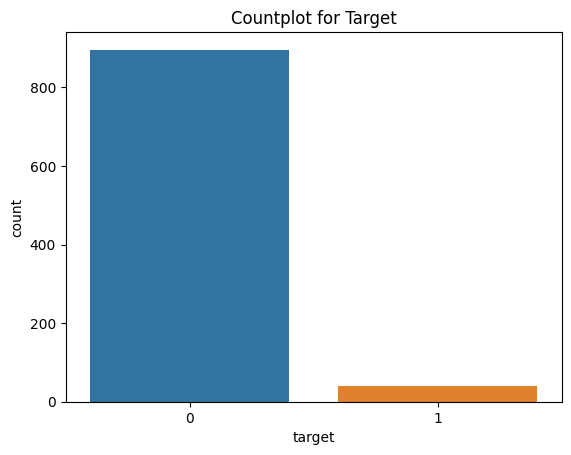

In [141]:
# CountpLot for Target Variable
sns.countplot(x = df['target'])
plt.title('Countplot for Target')
plt.show()

#Data Visualization

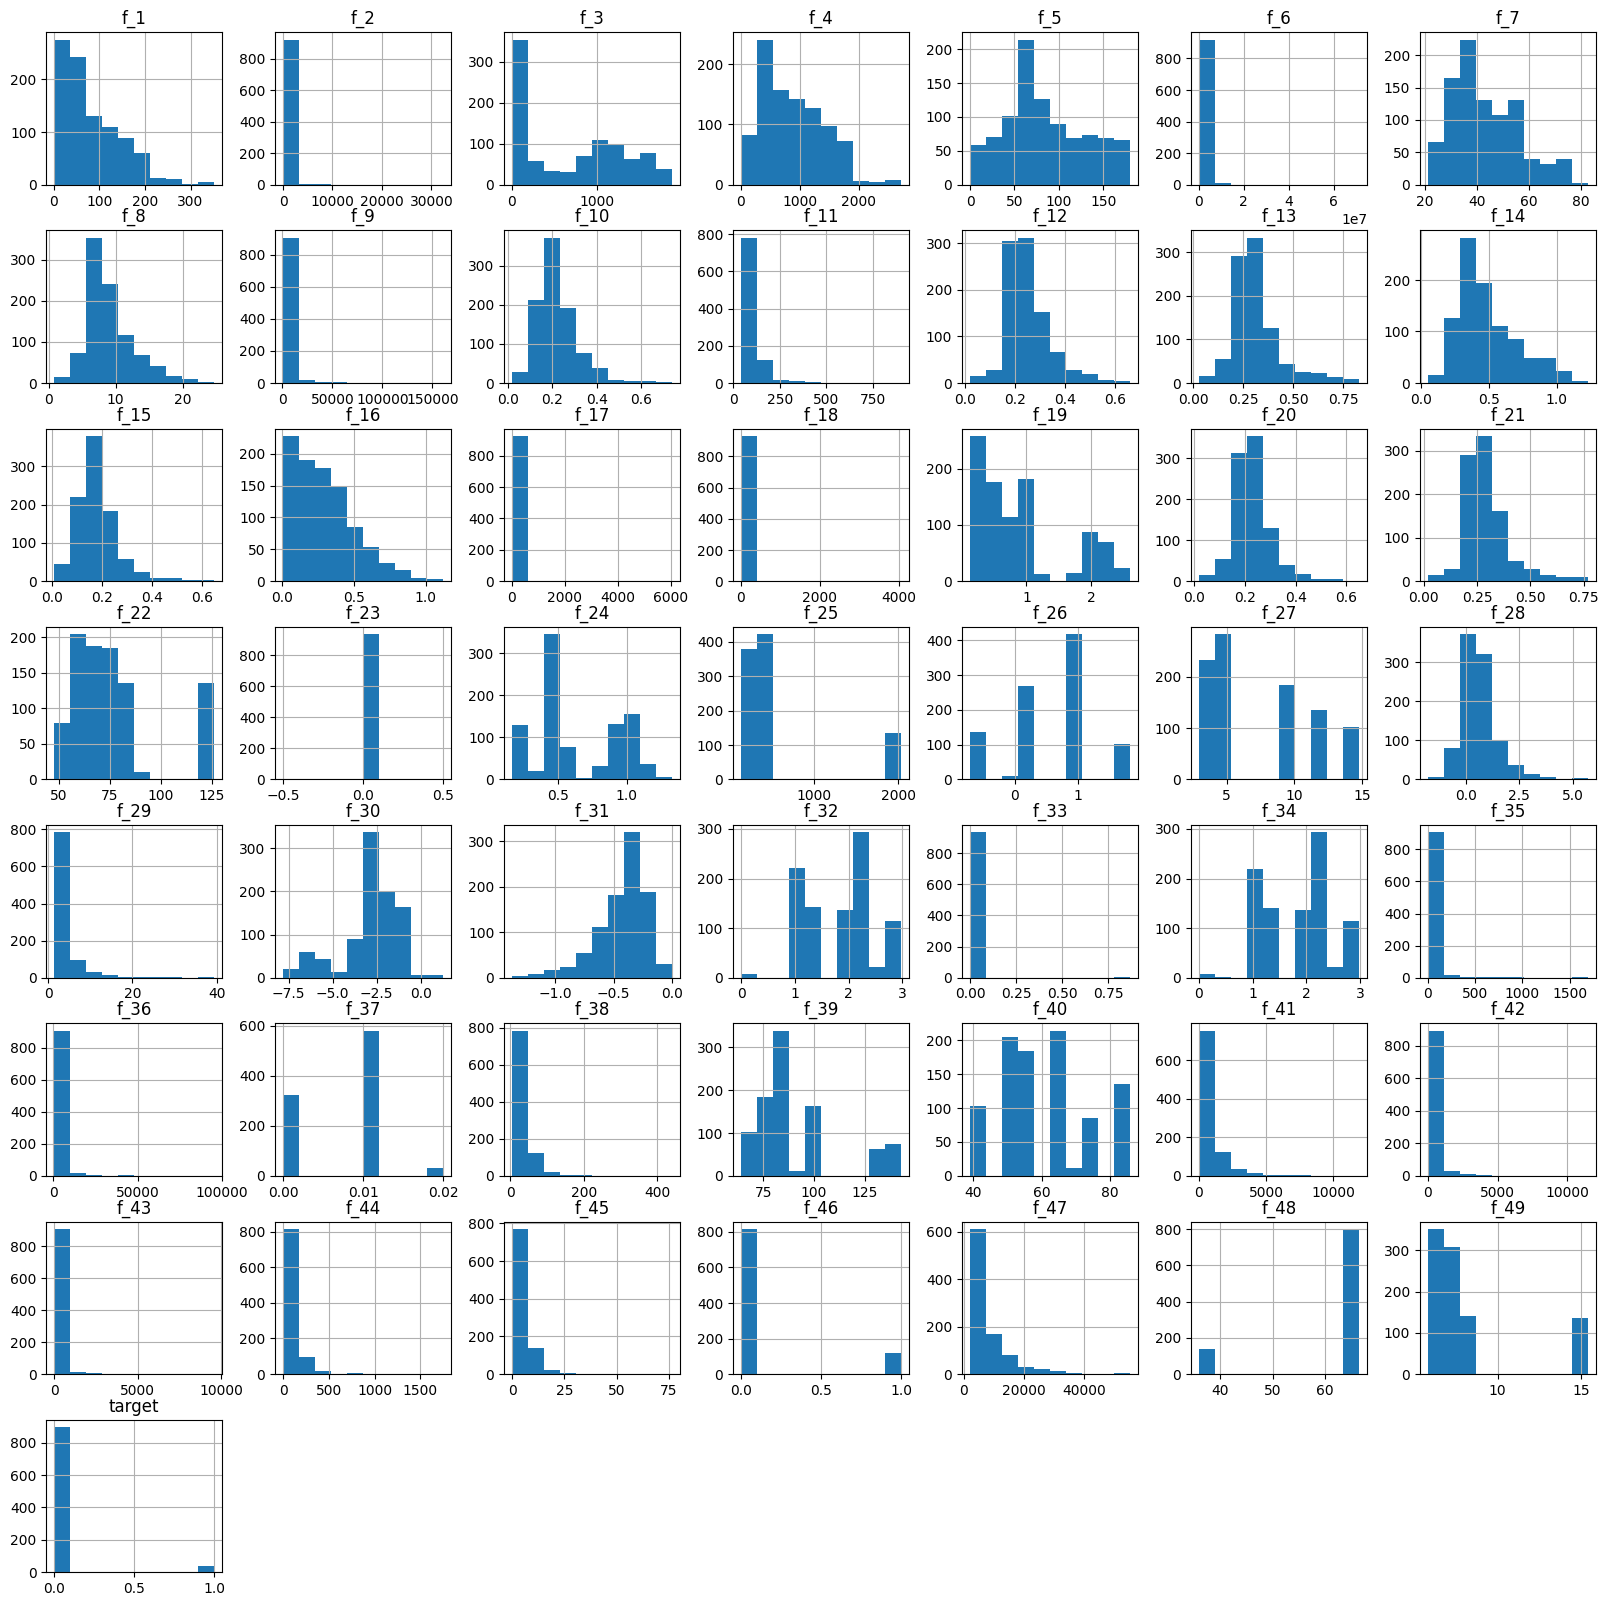

In [142]:
df.hist(figsize=(20,20))
plt.show()

Plotting CountPlot for all the features

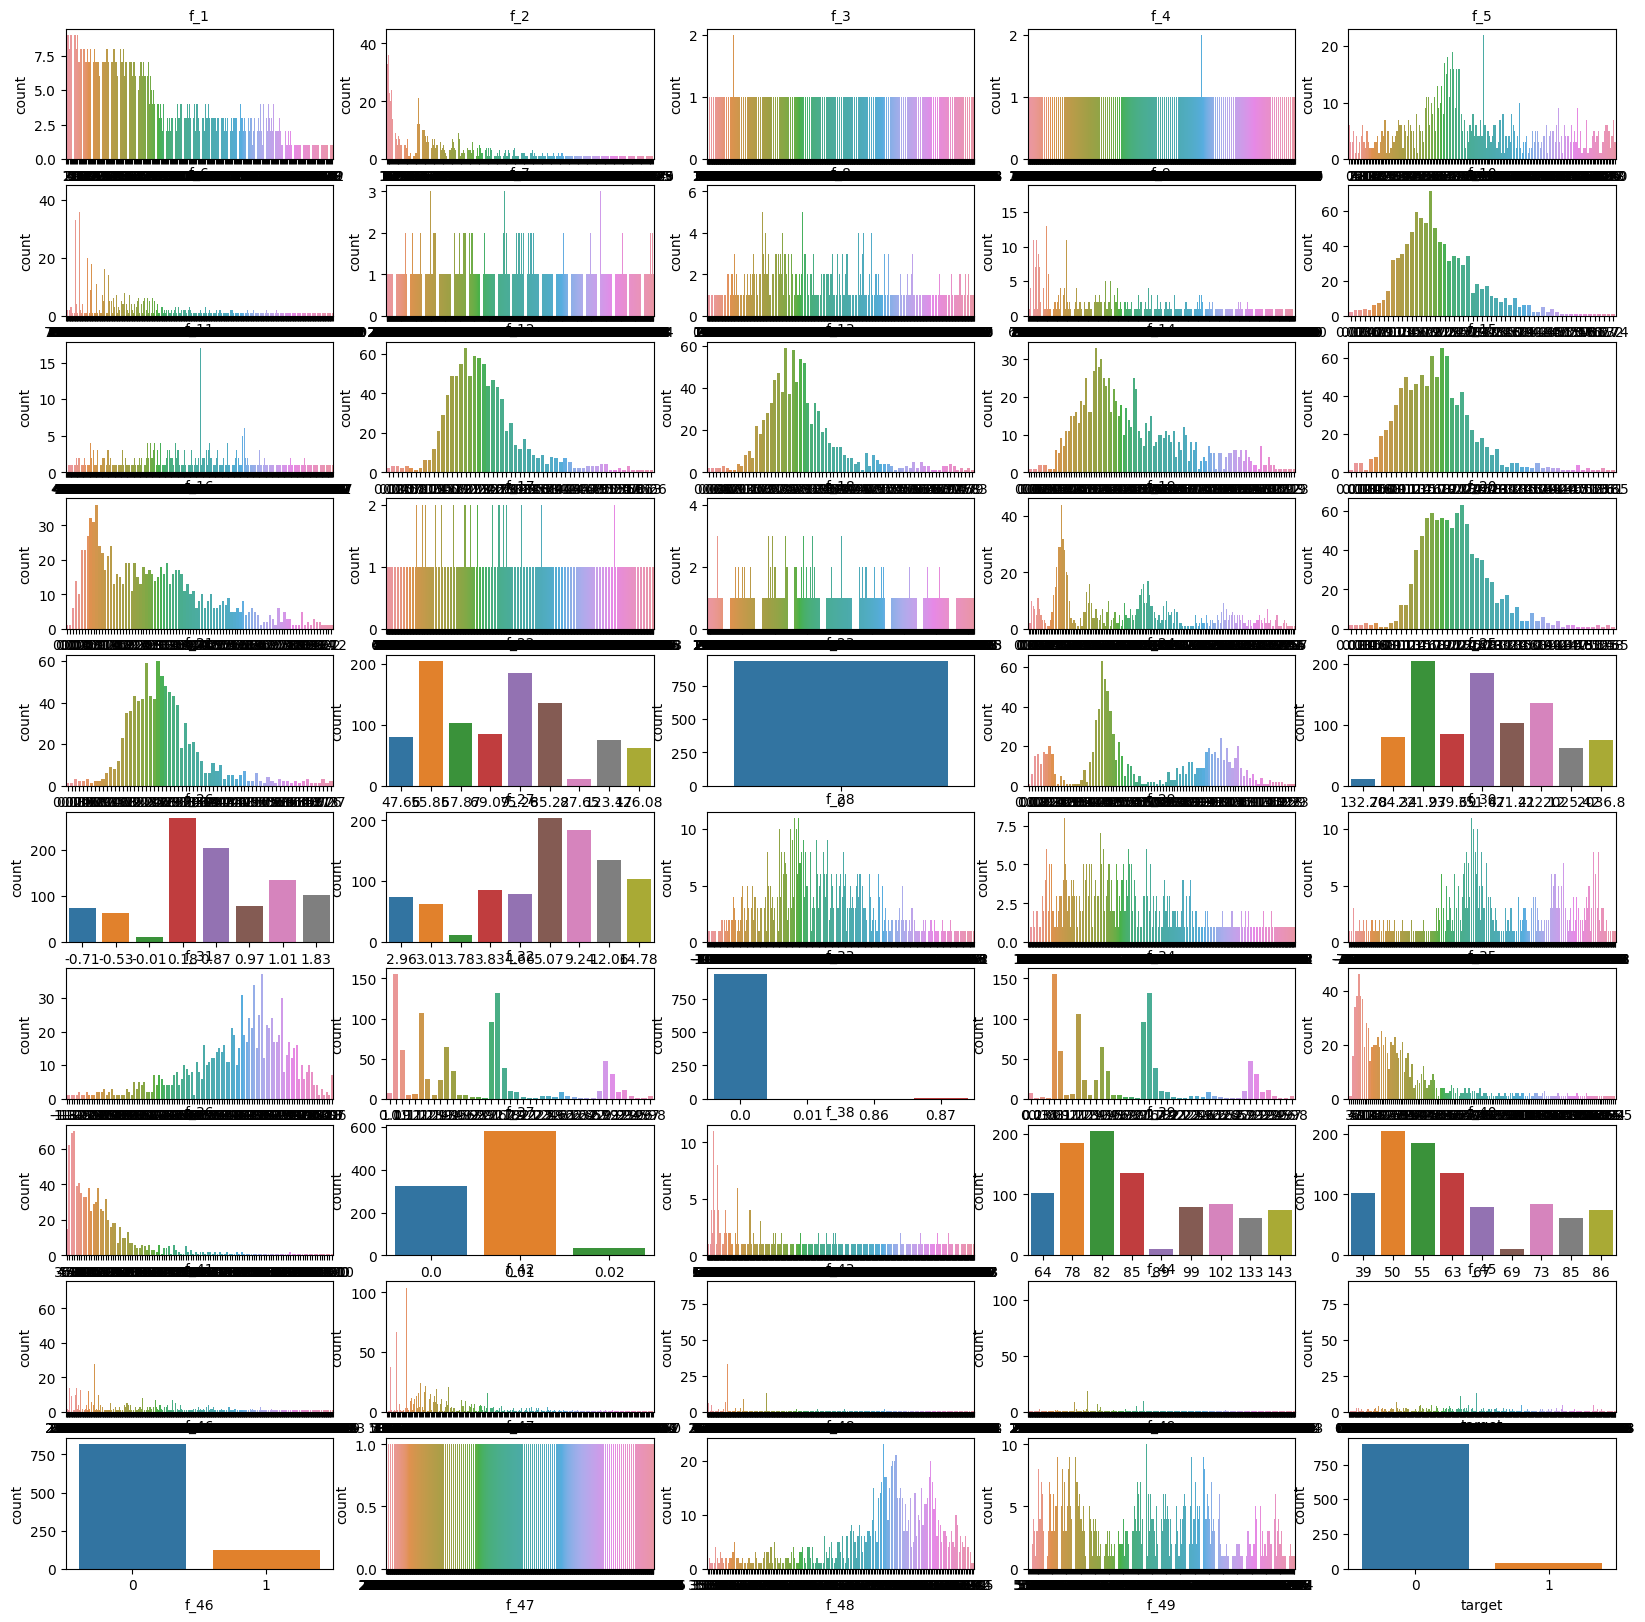

In [143]:
plt.figure(figsize = (20,20))
for i in range(50):
    plt.subplot(10,5, i+1)
    sns.countplot(x=df.iloc[:,i])
    plt.title(df.columns[i], size = 10)
plt.show()

Plotting boxplot for all features of dataset

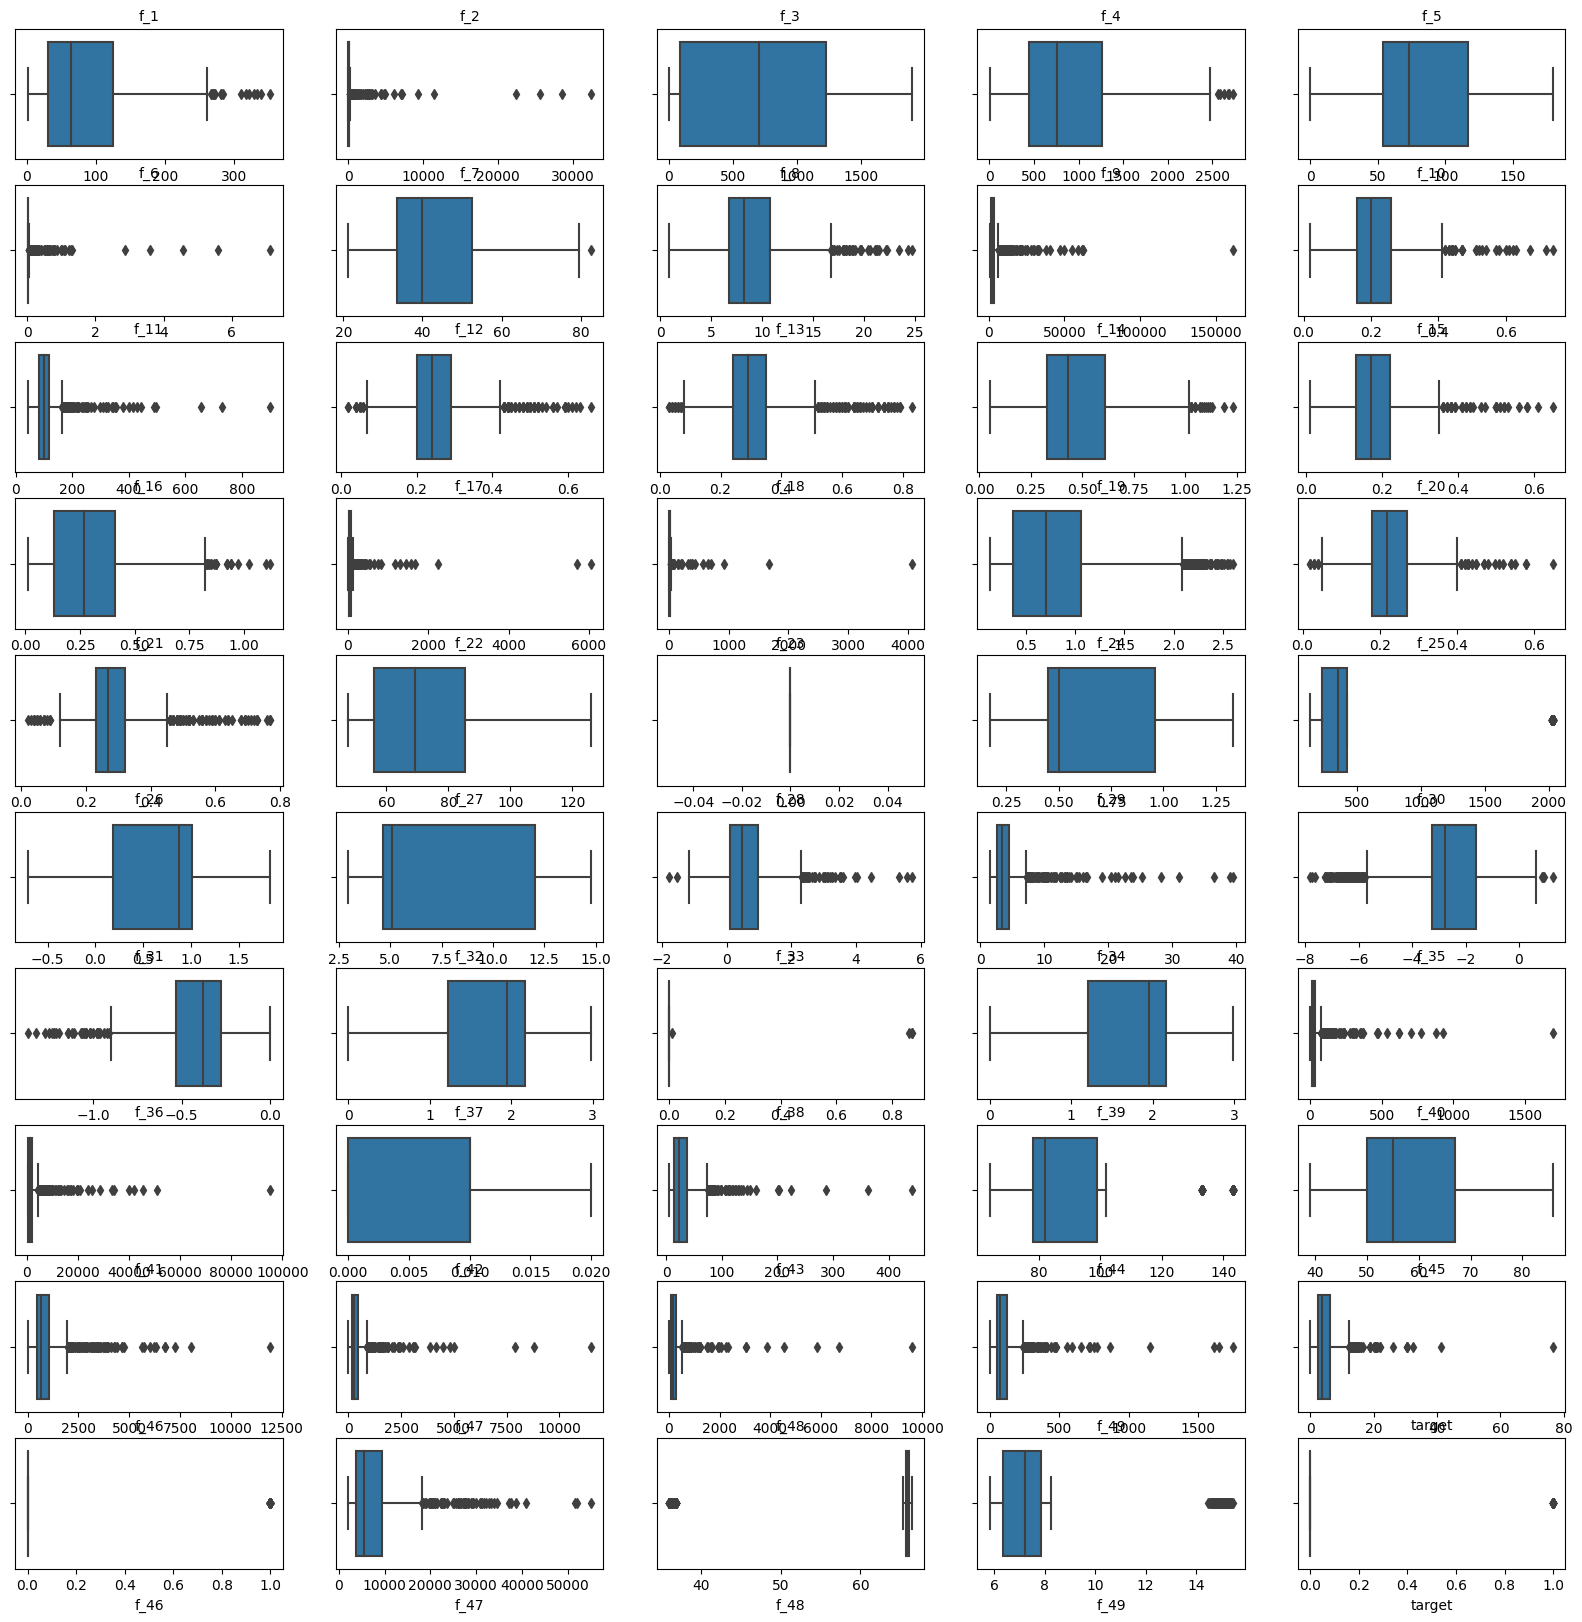

In [144]:
plt.figure(figsize = (20,20))
for i in range(50):
    plt.subplot(10,5, i+1)
    sns.boxplot(x=df.iloc[:,i])   # detect outliers
    plt.title(df.columns[i], size = 10)
plt.show()

Plotting correlation Plot

In [145]:
df.corr()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
f_1,1.000000,-0.155581,0.172017,-0.104116,-0.017025,-0.169533,-0.037412,-0.204983,-0.244551,-0.214447,...,-0.286190,-0.167466,-0.156916,-0.141792,-0.139478,-0.163693,-0.202983,0.294422,-0.253698,-0.180531
f_2,-0.155581,1.000000,0.058390,0.052638,-0.036870,0.953947,-0.136761,-0.016822,0.829978,0.128465,...,0.555154,0.777807,0.800939,0.716496,-0.080879,-0.048315,0.118792,-0.128222,0.139417,0.034128
f_3,0.172017,0.058390,1.000000,0.549510,-0.082764,0.050795,-0.627934,-0.349541,0.158686,0.073794,...,0.186920,0.178287,0.129653,0.176883,-0.088310,-0.182458,-0.022098,0.048291,0.162600,-0.035221
f_4,-0.104116,0.052638,0.549510,1.000000,0.048847,0.024693,-0.546205,-0.222063,0.097683,0.202167,...,-0.046934,0.032402,0.022234,0.000664,-0.220461,-0.204776,0.106758,-0.394081,0.476127,-0.050489
f_5,-0.017025,-0.036870,-0.082764,0.048847,1.000000,-0.028431,0.059128,0.123814,-0.047879,0.098573,...,-0.066930,-0.014877,-0.013742,-0.012346,-0.076695,-0.080136,0.070070,-0.135294,0.116896,-0.078598
f_6,-0.169533,0.953947,0.050795,0.024693,-0.028431,1.000000,-0.093589,-0.001395,0.894150,0.097449,...,0.594273,0.844597,0.868353,0.770044,-0.077783,-0.046834,0.126850,-0.058752,0.069731,0.049318
f_7,-0.037412,-0.136761,-0.627934,-0.546205,0.059128,-0.093589,1.000000,0.381206,-0.188076,-0.380340,...,-0.115014,-0.100003,-0.074308,-0.073751,0.077207,0.088633,-0.157243,0.483034,-0.612819,-0.026183
f_8,-0.204983,-0.016822,-0.349541,-0.222063,0.123814,-0.001395,0.381206,1.000000,0.001073,0.670628,...,0.013476,-0.015712,-0.013193,0.002439,-0.061639,-0.051879,-0.028117,-0.101155,0.033731,-0.014434
f_9,-0.244551,0.829978,0.158686,0.097683,-0.047879,0.894150,-0.188076,0.001073,1.000000,0.164098,...,0.675610,0.784833,0.770129,0.736075,-0.073312,-0.048994,0.102540,-0.080203,0.113389,0.076679
f_10,-0.214447,0.128465,0.073794,0.202167,0.098573,0.097449,-0.380340,0.670628,0.164098,1.000000,...,0.082449,0.052518,0.043116,0.042269,-0.113481,-0.095896,0.112275,-0.587156,0.603358,-0.013359


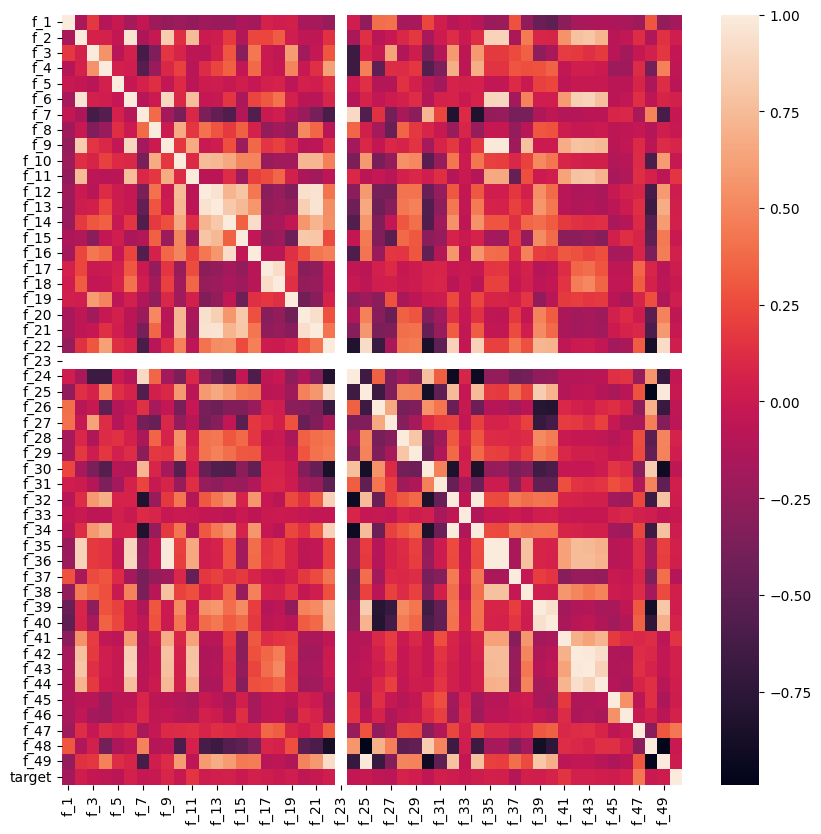

In [146]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

In [147]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()   # correlation matrix
    for i in range(len(corr_matrix.columns)):  # i is the index
        for j in range(i):
            if(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

corr_features = correlation(df, 0.90)
print("Features with high correlation ", corr_features)

Features with high correlation  ['f_20', 'f_36', 'f_13', 'f_43', 'f_44', 'f_21', 'f_40', 'f_18', 'f_24', 'f_35', 'f_49', 'f_16', 'f_25', 'f_6', 'f_34']


In [148]:
print(len(corr_features))

15


In [149]:
df.drop(columns=corr_features, axis=1, inplace=True)
print(df.shape)

(937, 35)


From this Plot it came to know that Column F_23 has only one value and it is of no use for data modelling. So, we will drop this column

In [150]:
df.drop(['f_23'],axis=1,inplace=True)

# we will also drop f_1 column because it is only a satellite image no so it is also of no use  for data modelling
df.drop('f_1',axis=1,inplace=True)

# checking for columns
df.columns

Index(['f_2', 'f_3', 'f_4', 'f_5', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12',
       'f_14', 'f_15', 'f_17', 'f_19', 'f_22', 'f_26', 'f_27', 'f_28', 'f_29',
       'f_30', 'f_31', 'f_32', 'f_33', 'f_37', 'f_38', 'f_39', 'f_41', 'f_42',
       'f_45', 'f_46', 'f_47', 'f_48', 'target'],
      dtype='object')

# Selecting the Dependent and Independent Features

In [151]:
x = df.drop('target',axis=1)  # dataframe
y = df['target']        # series
print(type(x))
print(type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 32) (937,)


# Models

# Train_test_Split

Dividing the data into training and testing data

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
print(937*0.25)

234.25


In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 32)
(235, 32)
(702,)
(235,)


# Standardization of Data

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-0.12783867,  0.30537828,  0.48842947, ..., -0.38835509,
        -0.69052373,  0.42304227],
       [-0.12510998,  0.75565684,  0.78134818, ..., -0.38835509,
        -0.31183471,  0.43717079],
       [ 0.21870407,  0.59998389, -0.54853873, ..., -0.38835509,
        -0.34780032,  0.40137855],
       ...,
       [-0.11828828,  0.83673685,  1.89593557, ..., -0.38835509,
         0.44472512,  0.45977641],
       [-0.16513067, -1.06324292, -0.47591989, ...,  2.57496306,
        -0.54672821,  0.44188029],
       [-0.16649501, -0.95307897, -0.53700381, ..., -0.38835509,
        -0.5216668 ,  0.44093839]])

Creating Functions to generate confusion matrix, classification report, accuracy score, ROC_AUC Score and to compute Training and Testing Score (accuracy score)

In [156]:
# Importing Libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [157]:
d = {'Model':[],'TP':[],'FN':[],'FP':[],'TN':[],'Acc':[],'AUC':[]}

def eval_model(model,model_name,x_test,ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    acc = accuracy_score(ytest,ypred)
    cls_rep = classification_report(ytest,ypred,zero_division=0)
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Confusion Matrix\n',cm)
    print('Accuracy Score',acc)
    print('AUC Score',auc_score)
    print('Classification Report\n',cls_rep)
    d['Model'].append(model_name)
    d['TP'].append(cm[0,0])
    d['FN'].append(cm[0,1])
    d['FP'].append(cm[1,0])
    d['TN'].append(cm[1,1])
    d['Acc'].append(acc)
    d['AUC'].append(auc_score)


def plot_roc_auc(model,ytest):
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Area Under Curve',auc_score)
    plt.plot(fpr,tpr,color='orange')
    plt.plot([0,1],[0,1],label='TPR=FPR')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend()
    plt.show()

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training dataset Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing dataset accuracy

# 1. Applying Logistic Regression

In [158]:
# importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

In [159]:
# Building the LogReg model
lr = LogisticRegression(max_iter=100000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=100000, solver='liblinear')

In [160]:
# Computing Training and testing score
mscore(lr)

Training Score 0.9672364672364673
Testing Score 0.9659574468085106


In [161]:
# Generating prediction
ypred_lr= lr.predict(x_test)
print(ypred_lr)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [162]:
# Evaluate the model - confusion matrix, clasification Report, AUC Score, Accuaracy
eval_model(lr,'Log_Reg',x_test,y_test,ypred_lr)

Confusion Matrix
 [[222   4]
 [  4   5]]
Accuracy Score 0.9659574468085106
AUC Score 0.8215339233038348
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       226
           1       0.56      0.56      0.56         9

    accuracy                           0.97       235
   macro avg       0.77      0.77      0.77       235
weighted avg       0.97      0.97      0.97       235



Area Under Curve 0.8215339233038348


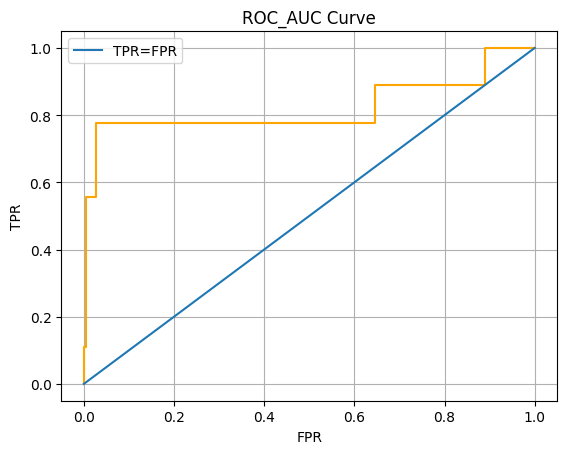

In [163]:
# Plotting ROC AUC Curve
plot_roc_auc(lr,y_test)

# Applying KNeighborsClassifier

In [164]:
# importing KNN library
from sklearn.neighbors import KNeighborsClassifier

In [165]:
# Building the KNN Classifier Model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [166]:
# Training and the Testing Score
mscore(knn)

Training Score 0.9601139601139601
Testing Score 0.9574468085106383


In [167]:
# Generating the predictions
ypred_knn = knn.predict(x_test)

In [168]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(knn,'KNN',x_test,y_test,ypred_knn)

Confusion Matrix
 [[224   2]
 [  8   1]]
Accuracy Score 0.9574468085106383
AUC Score 0.9129793510324484
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       226
           1       0.33      0.11      0.17         9

    accuracy                           0.96       235
   macro avg       0.65      0.55      0.57       235
weighted avg       0.94      0.96      0.95       235



Area Under Curve 0.9129793510324484


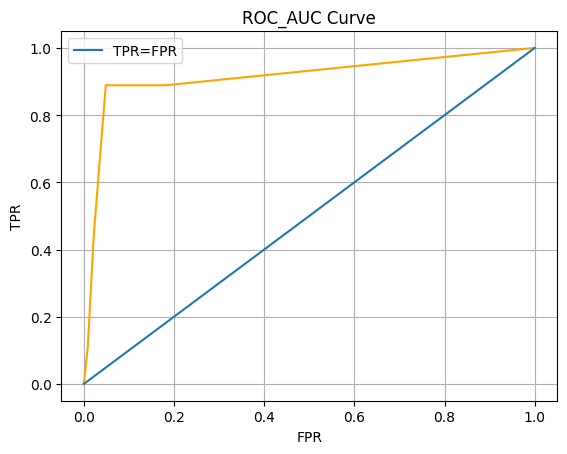

In [169]:
# Plotting ROC_AUC Curve
plot_roc_auc(knn,y_test)

# Applying Decision Tree Classifier

In [170]:
# importing DT library
from sklearn.tree import DecisionTreeClassifier

In [171]:
# Building the Decition Tree model
dt = DecisionTreeClassifier(criterion='gini',min_samples_split=50,max_depth=10,random_state=22)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=22)

In [172]:
# Training and the Testing Score
mscore(dt)

Training Score 0.9629629629629629
Testing Score 0.9361702127659575


In [173]:
# Generating the predictions
ypred_dt = dt.predict(x_test)

In [174]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(dt,'DT',x_test,y_test,ypred_dt)

Confusion Matrix
 [[220   6]
 [  9   0]]
Accuracy Score 0.9361702127659575
AUC Score 0.946165191740413
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       226
           1       0.00      0.00      0.00         9

    accuracy                           0.94       235
   macro avg       0.48      0.49      0.48       235
weighted avg       0.92      0.94      0.93       235



Area Under Curve 0.946165191740413


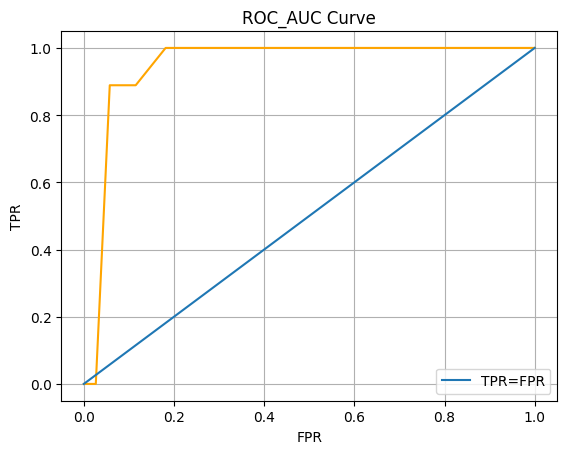

In [175]:
# Plotting ROC_AUC Curve
plot_roc_auc(dt,y_test)

# Applying RandomForest Classifier

In [176]:
# Import random Forest library
from sklearn.ensemble import RandomForestClassifier

In [177]:
# Building the RF Model
rf = RandomForestClassifier(n_estimators=80,criterion='gini',min_samples_split=50,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=50, n_estimators=80)

In [178]:
# Training and the testing Score
mscore(rf)

Training Score 0.9544159544159544
Testing Score 0.9617021276595744


In [179]:
# Generating the predictions
ypred_rf = rf.predict(x_test)

In [180]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(rf,'Random Forest',x_test,y_test,ypred_rf)

Confusion Matrix
 [[226   0]
 [  9   0]]
Accuracy Score 0.9617021276595744
AUC Score 0.9872173058013767
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       226
           1       0.00      0.00      0.00         9

    accuracy                           0.96       235
   macro avg       0.48      0.50      0.49       235
weighted avg       0.92      0.96      0.94       235



Area Under Curve 0.9872173058013767


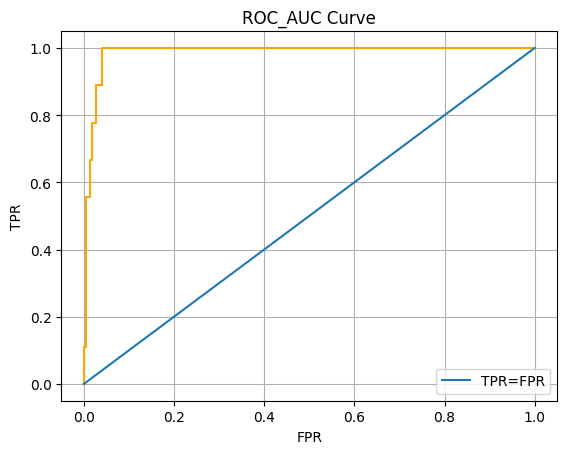

In [181]:
# Plotting ROC_AUC Curve
plot_roc_auc(rf,y_test)

# Applying Ensemble Learning

In [182]:
# Importing the  AdaBoost Classifier library
from sklearn.ensemble import AdaBoostClassifier

In [183]:
# Building the Adaboost model
adab = AdaBoostClassifier(n_estimators=100)
adab.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [184]:
# Computing the Training and Testing Score
mscore(adab)

Training Score 1.0
Testing Score 0.9574468085106383


In [185]:
# Generating the predictions
ypred_adab = adab.predict(x_test)

In [186]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(adab,'AdaBoost',x_test,y_test,ypred_adab)

Confusion Matrix
 [[222   4]
 [  6   3]]
Accuracy Score 0.9574468085106383
AUC Score 0.7428711897738446
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       226
           1       0.43      0.33      0.38         9

    accuracy                           0.96       235
   macro avg       0.70      0.66      0.68       235
weighted avg       0.95      0.96      0.95       235



Area Under Curve 0.7428711897738446


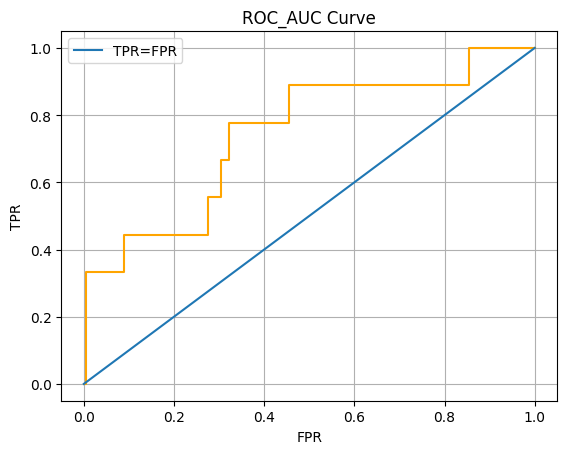

In [187]:
# Plotting the ROC_AUC Curve
plot_roc_auc(adab,y_test)

#  Comparing different Classification Models

In [188]:
print(d)

{'Model': ['Log_Reg', 'KNN', 'DT', 'Random Forest', 'AdaBoost'], 'TP': [222, 224, 220, 226, 222], 'FN': [4, 2, 6, 0, 4], 'FP': [4, 8, 9, 9, 6], 'TN': [5, 1, 0, 0, 3], 'Acc': [0.9659574468085106, 0.9574468085106383, 0.9361702127659575, 0.9617021276595744, 0.9574468085106383], 'AUC': [0.8215339233038348, 0.9129793510324484, 0.946165191740413, 0.9872173058013767, 0.7428711897738446]}


In [189]:
model_performance = pd.DataFrame(d)
model_performance

,Model,TP,FN,FP,TN,Acc,AUC
0,Log_Reg,222,4,4,5,0.965957,0.821534
1,KNN,224,2,8,1,0.957447,0.912979
2,DT,220,6,9,0,0.936170,0.946165
3,Random Forest,226,0,9,0,0.961702,0.987217
4,AdaBoost,222,4,6,3,0.957447,0.742871


Through this Data it came to know that Random Forest is the best model

# Generating Predictions on Test data using RandomForestClassifier

In [190]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(702, 32)
(235, 32)
(937, 32)
(937,)


Final model (RandomForest Classifier) based on Evaluation from model_performance dataframe

In [191]:
model = RandomForestClassifier(n_estimators=80)
model.fit(x,y)

RandomForestClassifier(n_estimators=80)

Generating Prediction on test data

In [192]:
ypred = model.predict(x_test)
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Save the Model

In [193]:
import pickle

In [194]:
pickle.dump(model, open('rf.pkl', 'wb'))   # wb = write binary

# Load the Model

In [195]:
loaded_model = pickle.load(open('rf.pkl', 'rb'))  # rb = read binary
loaded_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Creating a Random Dataset and Applying the saved model to predict the target column for the new df

In [196]:
random = df.sample(20)
random_df = random.drop('target',axis=1)
random_df

,f_2,f_3,f_4,f_5,f_7,f_8,f_9,f_10,f_11,f_12,...,f_33,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48
768,19,49.05,399.26,64,54.79,8.52,1805.0,0.16,85.3,0.22,...,0.0,0.01,21.17,82,886.40,90.00,12.66,1,2525.72,65.88
832,10,72.50,435.80,60,51.70,6.57,921.0,0.13,87.9,0.29,...,0.0,0.01,10.47,82,402.49,127.28,12.65,0,2555.87,65.94
414,62,897.52,873.10,63,39.63,5.70,2000.0,0.14,77.5,0.17,...,0.0,0.01,25.81,85,514.78,360.56,2.64,0,3622.65,65.86
110,149,1626.17,1291.23,4,36.61,7.54,3700.0,0.21,100.7,0.26,...,0.0,0.01,36.75,78,1253.99,500.00,5.27,0,3566.68,66.19
404,51,944.16,994.06,74,34.31,5.72,1780.0,0.17,71.6,0.20,...,0.0,0.01,24.85,85,570.09,316.23,4.12,0,2818.37,65.92
531,94,72.24,1392.33,38,30.31,8.29,2167.0,0.27,61.0,0.29,...,0.0,0.01,35.52,143,0.00,0.00,0.00,0,7625.15,36.05
406,130,1038.87,970.38,119,37.19,9.75,2470.0,0.26,131.6,0.17,...,0.0,0.00,18.77,85,738.24,583.10,2.13,0,2852.38,65.92
934,14,25.14,428.86,24,60.14,17.94,847.0,0.30,133.9,0.28,...,0.0,0.00,6.33,82,402.49,180.00,2.24,0,2153.05,65.91
834,11,116.27,398.73,59,50.64,6.36,1011.0,0.13,88.1,0.25,...,0.0,0.01,11.47,82,524.79,127.28,20.62,0,2688.38,65.90
584,91,12.18,370.88,87,54.81,10.23,4155.0,0.19,177.4,0.21,...,0.0,0.00,23.42,99,1440.00,720.00,3.51,0,9299.19,65.83


In [197]:
random_df.shape

(20, 32)

In [198]:
random_df.to_csv('sample_df')

In [199]:
sample_df = pd.read_csv('/content/sample_df')
sample_df

,Unnamed: 0,f_2,f_3,f_4,f_5,f_7,f_8,f_9,f_10,f_11,...,f_33,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48
0,768,19,49.05,399.26,64,54.79,8.52,1805.0,0.16,85.3,...,0.0,0.01,21.17,82,886.40,90.00,12.66,1,2525.72,65.88
1,832,10,72.50,435.80,60,51.70,6.57,921.0,0.13,87.9,...,0.0,0.01,10.47,82,402.49,127.28,12.65,0,2555.87,65.94
2,414,62,897.52,873.10,63,39.63,5.70,2000.0,0.14,77.5,...,0.0,0.01,25.81,85,514.78,360.56,2.64,0,3622.65,65.86
3,110,149,1626.17,1291.23,4,36.61,7.54,3700.0,0.21,100.7,...,0.0,0.01,36.75,78,1253.99,500.00,5.27,0,3566.68,66.19
4,404,51,944.16,994.06,74,34.31,5.72,1780.0,0.17,71.6,...,0.0,0.01,24.85,85,570.09,316.23,4.12,0,2818.37,65.92
5,531,94,72.24,1392.33,38,30.31,8.29,2167.0,0.27,61.0,...,0.0,0.01,35.52,143,0.00,0.00,0.00,0,7625.15,36.05
6,406,130,1038.87,970.38,119,37.19,9.75,2470.0,0.26,131.6,...,0.0,0.00,18.77,85,738.24,583.10,2.13,0,2852.38,65.92
7,934,14,25.14,428.86,24,60.14,17.94,847.0,0.30,133.9,...,0.0,0.00,6.33,82,402.49,180.00,2.24,0,2153.05,65.91
8,834,11,116.27,398.73,59,50.64,6.36,1011.0,0.13,88.1,...,0.0,0.01,11.47,82,524.79,127.28,20.62,0,2688.38,65.90
9,584,91,12.18,370.88,87,54.81,10.23,4155.0,0.19,177.4,...,0.0,0.00,23.42,99,1440.00,720.00,3.51,0,9299.19,65.83


In [200]:
sample_df.head()

,Unnamed: 0,f_2,f_3,f_4,f_5,f_7,f_8,f_9,f_10,f_11,...,f_33,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48
0,768,19,49.05,399.26,64,54.79,8.52,1805.0,0.16,85.3,...,0.0,0.01,21.17,82,886.40,90.00,12.66,1,2525.72,65.88
1,832,10,72.50,435.80,60,51.70,6.57,921.0,0.13,87.9,...,0.0,0.01,10.47,82,402.49,127.28,12.65,0,2555.87,65.94
2,414,62,897.52,873.10,63,39.63,5.70,2000.0,0.14,77.5,...,0.0,0.01,25.81,85,514.78,360.56,2.64,0,3622.65,65.86
3,110,149,1626.17,1291.23,4,36.61,7.54,3700.0,0.21,100.7,...,0.0,0.01,36.75,78,1253.99,500.00,5.27,0,3566.68,66.19
4,404,51,944.16,994.06,74,34.31,5.72,1780.0,0.17,71.6,...,0.0,0.01,24.85,85,570.09,316.23,4.12,0,2818.37,65.92


In [201]:
sample_df.shape

(20, 33)

In [202]:
sample_df.columns

Index(['Unnamed: 0', 'f_2', 'f_3', 'f_4', 'f_5', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_14', 'f_15', 'f_17', 'f_19', 'f_22', 'f_26', 'f_27',
       'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_37', 'f_38', 'f_39',
       'f_41', 'f_42', 'f_45', 'f_46', 'f_47', 'f_48'],
      dtype='object')

In [203]:
sample_df= sample_df.drop("Unnamed: 0", axis=1)
sample_df.columns

Index(['f_2', 'f_3', 'f_4', 'f_5', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12',
       'f_14', 'f_15', 'f_17', 'f_19', 'f_22', 'f_26', 'f_27', 'f_28', 'f_29',
       'f_30', 'f_31', 'f_32', 'f_33', 'f_37', 'f_38', 'f_39', 'f_41', 'f_42',
       'f_45', 'f_46', 'f_47', 'f_48'],
      dtype='object')

In [204]:
# making prediction on random data
predicted_data = loaded_model.predict(sample_df)
print(predicted_data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [205]:
#  Compare the actual data and predicted data
new_data_with_predictions = random.copy()
new_data_with_predictions["predicted_target"] = predicted_data

# Print the actual and predicted data
print("Actual Data and Predicted Data:")
print(new_data_with_predictions[["target", "predicted_target"]])

Actual Data and Predicted Data:
     target  predicted_target
768       0                 0
832       0                 0
414       0                 0
110       0                 0
404       0                 0
531       0                 0
406       0                 0
934       0                 0
834       0                 0
584       0                 0
894       0                 0
82        0                 0
92        0                 0
450       1                 1
354       0                 0
220       0                 0
58        0                 0
612       0                 0
319       0                 0
332       0                 0
